# PLA

No handles with labels found to put in legend.


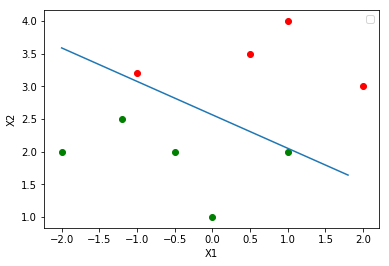

In [2]:
#2018/04/26   逃课写的hhhhhhhhhhhhhhhh

from sklearn.datasets.samples_generator import *
import matplotlib.pyplot as plt
from numpy import *

def createTrainDataSet():    #样本含2个特征,第一个1对应w0
    trainData=[     [1, 1, 4],  
                    [1, 2, 3],                         
                    [1, -2, 2],   
                    [1, 0, 1],   
                    [1, 1, 2],
                    [1, -1., 3.2], 
                    [1, -1.2, 2.5],
                    [1, 0.5, 3.5],
                    [1, -.5, 2.] ]
    label= [1, 1, -1, -1, -1, 1, -1, 1, -1]  
    return trainData, label

def presee_distri():    #预览数据分布特点
    x, y = createTrainDataSet()
    xcord1 = [] ; ycord1 = [] ; xcord2 = [] ; ycord2 = []
    m = len(x)
    for i in range(m):
        if y[i] == 1:
            xcord1.append(x[i][1])
            ycord1.append(x[i][2])

        else:
            xcord2.append(x[i][1])
            ycord2.append(x[i][2])
    plt.scatter(xcord1, ycord1, color='r')
    plt.scatter(xcord2, ycord2, color='g')
    plt.legend()
    plt.show()

def sigmoid(score):           #准确说这不是sigmoid，而是阶跃函数
    if score > 0:
        return 1
    if score < 0:
        return -1
    return 0

def createTestDataSet():       #测试集  
    testData = [   [1, 1, 1],  
                   [1, 2, 0],   
                   [1, 2, 4],   
                   [1, 1, 3]  ]
    return testData

def PLA():
    data, label = createTrainDataSet()
    data = array(data)
    m, n = data.shape
    weights = ones(n)  #weights为行向量nd
    #weights = array([4.0, 4.0, 4.0])   #经过测试,weights初始化为4效果比初始化为1更好，为什么？
    isComplete = True
    while isComplete:  #只要上次遍历过程有一个点被分错，就要再进行一次遍历直到没有错分点
        isComplete = False
        for i in range(m):         #遍历每个样本
            score = sum(weights * data[i, :])
            if sigmoid(score) != label[i]:
                isComplete = True
                weights +=  label[i] * data[i]

    return weights

def plotBestFit():    #可视化
    weights = PLA()
    x, y = createTrainDataSet()
    xcord1 = [] ; ycord1 = [] ; xcord2 = [] ; ycord2 = []
    m = len(x)
    for i in range(m):
        if y[i] == 1:
            xcord1.append(x[i][1])
            ycord1.append(x[i][2])

        else:
            xcord2.append(x[i][1])
            ycord2.append(x[i][2])
    plt.scatter(xcord1, ycord1, color='r')
    plt.scatter(xcord2, ycord2, color='g')

    x_pred = arange(-2, 2, 0.2)
    y_pred = (-weights[0] - weights[1] * x_pred) / weights[2]
    plt.plot(x_pred, y_pred)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()
    
    return 

plotBestFit()

# 特征转换PLA

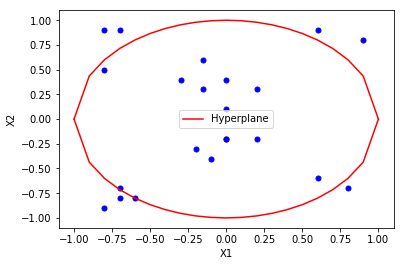

In [4]:
#2018/05/02
from numpy import *
import matplotlib.pyplot as plt

def sigmoid(score):
    if score > 0:
        return 1
    if score < 0:
        return -1
    return 0

def PLA(dataArr, labels):
    m, n = dataArr.shape
    weights = ones(n)  #weights为行向量nd
    #weights = array([4.0, 4.0, 4.0])   #经过测试,weights初始化为4效果比初始化为1更好，为什么？
    isComplete = True
    while isComplete:  #只要上次遍历过程有一个点被分错，就要再进行一次遍历直到没有错分点
        isComplete = False
        for i in range(m):         #遍历每个样本
            score = sum(weights * dataArr[i, :])
            if sigmoid(score) != labels[i]:
                isComplete = True
                weights +=  labels[i] * dataArr[i]
    return weights

def createTrainSet():
    x1 = [0, 0, 0.2, 0.2, -0.8, -0.7, -0.8, -0.7, -0.8, -0.7, -0.6, 0.6, 0, 0.9, 0.6, 0.8, 0, -0.15, -0.3, -0.15, -0.2, -0.1]
    x2 = [0.1, -0.2, 0.3, -0.2, -0.9, -0.7, 0.5, 0.9, 0.9, -0.8, -0.8, 0.9, -0.2, 0.8, -0.6, -0.7, 0.4, 0.6, 0.4, 0.3, -0.3, -0.4 ]
    return x1, x2

def getWeights():
    x1, x2 = createTrainSet() 

    length = len(x1)
    list_ = []
    
    for i in range(length):
        temp_list = [1]
        temp_list.append(x1[i] **2)
        temp_list.append(x2[i] **2)
        list_.append(temp_list)
    dataArr = array(list_)

    label_list = []                 #这里我是按离圆心的距离判断类别，因为懒
    for j in range(length):
        dist = x1[j] **2 + x2[j] **2
        if dist < 0.4:
            label_list.append(-1)

        else:
            label_list.append(1)

    weights = PLA(dataArr, label_list)
    return weights

#[-1.    1.49  1.4 ]  weights

def plotBestFit(weights):
    x_test = arange(-1, 1.1, 0.1)
    y_test = pow(1 - x_test**2, 0.5)
    x1_train, x2_train = createTrainSet()
    
    plt.scatter(x1_train, x2_train, marker='o', s=25, color='b')
    plt.plot(x_test, y_test, label='Hyperplane', color='r')
    plt.plot(x_test, -y_test, color='r')    #圆的下半部分，y < 0
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

def seeResult():
    weights = getWeights()
    plotBestFit(weights)
    return 

seeResult()

圈里的点其实是红色的